#Import Data and Libraries

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Predictive Analytics- FS/Projects/Project 3 Classification/organics.csv'
organics_data = pd.read_csv(data_path)

# preview data
organics_data.info()
organics_data.head
print(organics_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
             ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender  \
0           140     10.0    76.0        16.0               C     

#Data Cleaning

In [ ]:
organics_data.fillna(organics_data.mean(), inplace=True)
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          22223 non-null  float64
 2   DemAge           22223 non-null  float64
 3   DemCluster       22223 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         22223 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
organics_data['DemClusterGroup'].fillna('U', inplace=True)
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          22223 non-null  float64
 2   DemAge           22223 non-null  float64
 3   DemCluster       22223 non-null  float64
 4   DemClusterGroup  22223 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         22223 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
organics_data['DemGender'].fillna('U', inplace=True)
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          22223 non-null  float64
 2   DemAge           22223 non-null  float64
 3   DemCluster       22223 non-null  float64
 4   DemClusterGroup  22223 non-null  object 
 5   DemGender        22223 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         22223 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
organics_data['DemReg'].fillna('Unknown', inplace=True)
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          22223 non-null  float64
 2   DemAge           22223 non-null  float64
 3   DemCluster       22223 non-null  float64
 4   DemClusterGroup  22223 non-null  object 
 5   DemGender        22223 non-null  object 
 6   DemReg           22223 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         22223 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
organics_data['DemTVReg'].fillna('Unknown', inplace=True)
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          22223 non-null  float64
 2   DemAge           22223 non-null  float64
 3   DemCluster       22223 non-null  float64
 4   DemClusterGroup  22223 non-null  object 
 5   DemGender        22223 non-null  object 
 6   DemReg           22223 non-null  object 
 7   DemTVReg         22223 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         22223 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
# drop unnecessary columns
organics_data.drop(['ID'], axis=1, inplace=True)
organics_data['TargetBuy'] = organics_data['TargetBuy'].astype('category')

In [ ]:
organics_data.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


#Exploratory Analysis

Text(0, 0.5, '')

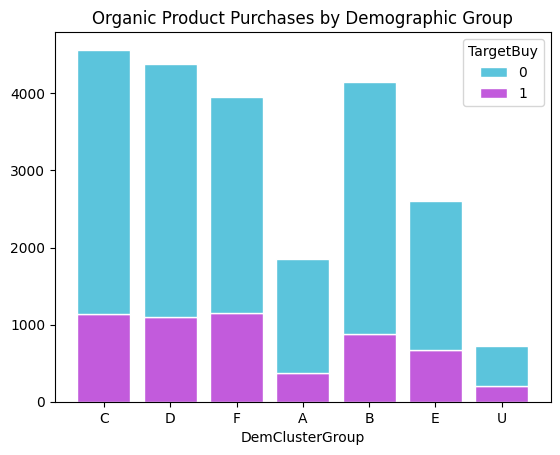

In [ ]:
# Explore the relationship between winning a sale and part type

ax = sns.histplot(
    organics_data,
    x='DemClusterGroup',
    hue='TargetBuy',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
)

ax.set_title('Organic Product Purchases by Demographic Group')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

Text(0, 0.5, '')

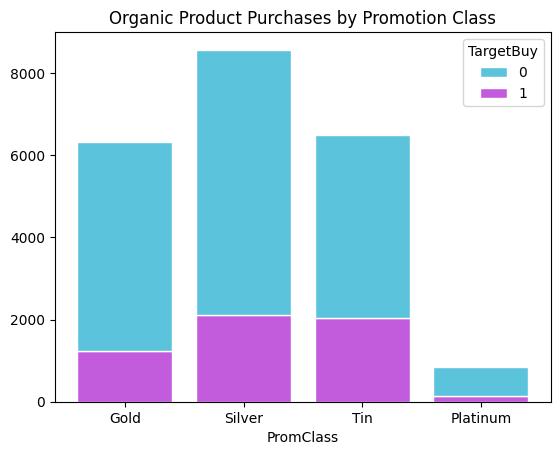

In [ ]:
# Explore the relationship between winning a sale and part type

ax = sns.histplot(
    organics_data,
    x='PromClass',
    hue='TargetBuy',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
)

ax.set_title('Organic Product Purchases by Promotion Class')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

Text(0, 0.5, '')

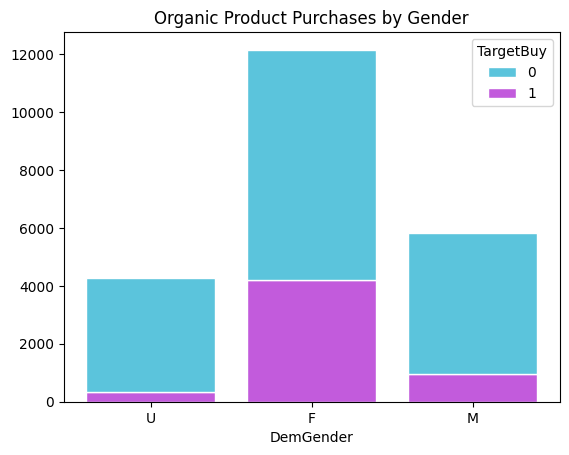

In [ ]:
# Explore the relationship between winning a sale and part type

ax = sns.histplot(
    organics_data,
    x='DemGender',
    hue='TargetBuy',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
)

ax.set_title('Organic Product Purchases by Gender')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

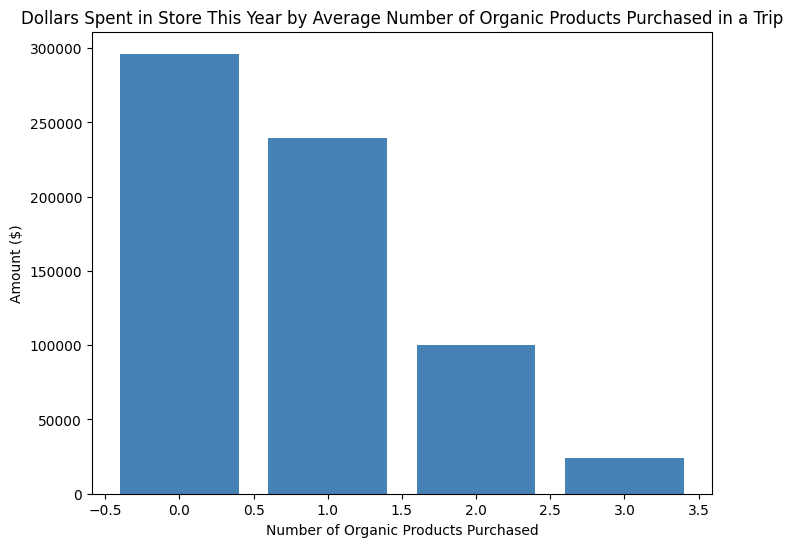

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(organics_data["TargetAmt"], organics_data["PromSpend"], color='steelblue')
plt.title('Dollars Spent in Store This Year by Average Number of Organic Products Purchased in a Trip')
plt.xlabel('Number of Organic Products Purchased')
plt.ylabel('Amount ($)')
plt.show()

#Default Logistic

In [ ]:
organics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          22223 non-null  float64 
 1   DemAge           22223 non-null  float64 
 2   DemCluster       22223 non-null  float64 
 3   DemClusterGroup  22223 non-null  object  
 4   DemGender        22223 non-null  object  
 5   DemReg           22223 non-null  object  
 6   DemTVReg         22223 non-null  object  
 7   PromClass        22223 non-null  object  
 8   PromSpend        22223 non-null  float64 
 9   PromTime         22223 non-null  float64 
 10  TargetBuy        22223 non-null  category
 11  TargetAmt        22223 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
# split the data into training and testing sets
X = organics_data.drop(['TargetBuy','TargetAmt'], axis=1)
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass'], drop_first=False)

y = organics_data['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_A      15556 non-null  uint8  
 6   DemClusterGroup_B      15556 non-null  uint8  
 7   DemClusterGroup_C      15556 non-null  uint8  
 8   DemClusterGroup_D      15556 non-null  uint8  
 9   DemClusterGroup_E      15556 non-null  uint8  
 10  DemClusterGroup_F      15556 non-null  uint8  
 11  DemClusterGroup_U      15556 non-null  uint8  
 12  DemGender_F            15556 non-null  uint8  
 13  DemGender_M            15556 non-null  uint8  
 14  DemGender_U            15556 non-null  uint8  
 15 

In [ ]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.436880
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15526
Method:                           MLE   Df Model:                           29
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.2195
Time:                        02:48:37   Log-Likelihood:                -6796.1
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5123        nan        nan        nan         nan         

In [ ]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   DemAffl                15556 non-null  float64 
 1   DemAge                 15556 non-null  float64 
 2   DemCluster             15556 non-null  float64 
 3   PromSpend              15556 non-null  float64 
 4   PromTime               15556 non-null  float64 
 5   DemClusterGroup_A      15556 non-null  uint8   
 6   DemClusterGroup_B      15556 non-null  uint8   
 7   DemClusterGroup_C      15556 non-null  uint8   
 8   DemClusterGroup_D      15556 non-null  uint8   
 9   DemClusterGroup_E      15556 non-null  uint8   
 10  DemClusterGroup_F      15556 non-null  uint8   
 11  DemClusterGroup_U      15556 non-null  uint8   
 12  DemGender_F            15556 non-null  uint8   
 13  DemGender_M            15556 non-null  uint8   
 14  DemGender_U            15556 non-nu

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print('---training set---')
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print('---test set---')
print(conf_matrix)

---training set---
[[11049  2350]
 [  654  1503]]
---test set---
[[4743  966]
 [ 272  686]]


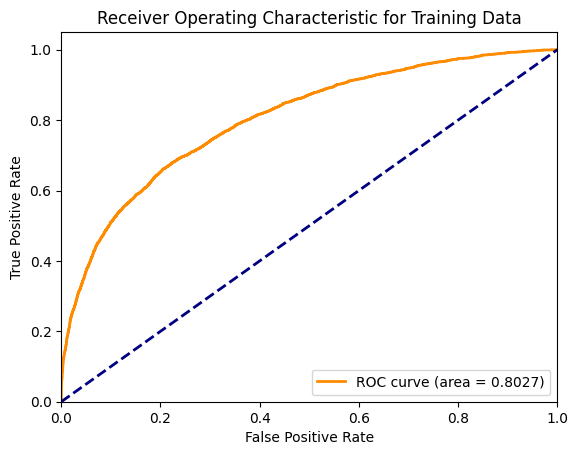

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

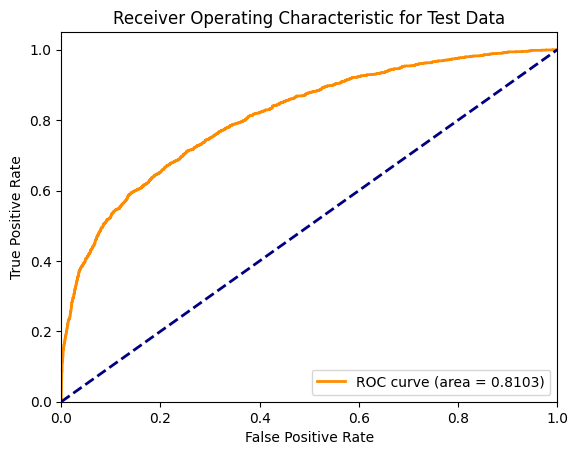

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8069
Precision (Train): 0.6968
Recall (Train)  : 0.3901

Accuracy (Test) : 0.8143
Precision (Test): 0.7161
Recall (Test)  : 0.4153



#Elastic Net Logistic

In [ ]:
# split the data into training and testing sets
X2 = organics_data.drop(['TargetBuy','TargetAmt'], axis=1)
#X2=organics_data[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender','DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetAmt']]

X2 = pd.get_dummies(X2, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass'], drop_first=False)

y2 = organics_data['TargetBuy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()

y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_A      15556 non-null  uint8  
 6   DemClusterGroup_B      15556 non-null  uint8  
 7   DemClusterGroup_C      15556 non-null  uint8  
 8   DemClusterGroup_D      15556 non-null  uint8  
 9   DemClusterGroup_E      15556 non-null  uint8  
 10  DemClusterGroup_F      15556 non-null  uint8  
 11  DemClusterGroup_U      15556 non-null  uint8  
 12  DemGender_F            15556 non-null  uint8  
 13  DemGender_M            15556 non-null  uint8  
 14  DemGender_U            15556 non-null  uint8  
 15 

In [ ]:
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr_l12.fit(X2_train, y2_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients12 = rpt_model_variables(lr_l12)

                  feature  coefficient  abs_coefficient
1                  DemAge      -0.0004           0.0004
2              DemCluster      -0.0002           0.0002
3               PromSpend      -0.0001           0.0001
4                PromTime      -0.0001           0.0001
0                 DemAffl      -0.0000           0.0000
30        DemTVReg_S West      -0.0000           0.0000
24        DemTVReg_London      -0.0000           0.0000
25      DemTVReg_Midlands      -0.0000           0.0000
26        DemTVReg_N East      -0.0000           0.0000
27        DemTVReg_N Scot      -0.0000           0.0000
28        DemTVReg_N West      -0.0000           0.0000
29    DemTVReg_S & S East      -0.0000           0.0000
32       DemTVReg_Unknown      -0.0000           0.0000
31        DemTVReg_Ulster      -0.0000           0.0000
22    DemTVReg_C Scotland      -0.0000           0.0000
33  DemTVReg_Wales & West      -0.0000           0.0000
34     DemTVReg_Yorkshire      -0.0000          

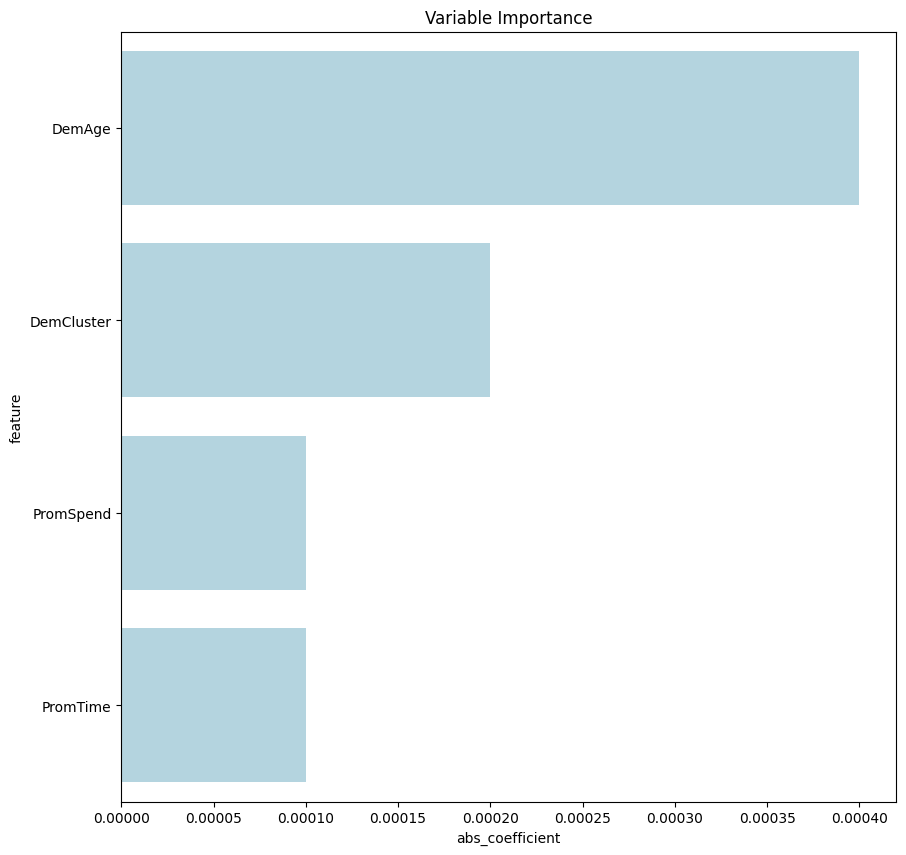

-- rejected --
 DemAffl
 DemTVReg_S West
 DemTVReg_London
 DemTVReg_Midlands
 DemTVReg_N East
 DemTVReg_N Scot
 DemTVReg_N West
 DemTVReg_S & S East
 DemTVReg_Unknown
 DemTVReg_Ulster
 DemTVReg_C Scotland
 DemTVReg_Wales & West
 DemTVReg_Yorkshire
 PromClass_Gold
 PromClass_Platinum
 PromClass_Silver
 DemTVReg_East
 DemReg_South West
 DemTVReg_Border
 DemClusterGroup_U
 DemClusterGroup_A
 DemClusterGroup_B
 DemClusterGroup_C
 DemClusterGroup_D
 DemClusterGroup_E
 DemClusterGroup_F
 DemGender_F
 DemReg_Unknown
 DemGender_M
 DemGender_U
 DemReg_Midlands
 DemReg_North
 DemReg_Scottish
 DemReg_South East
 PromClass_Tin


In [ ]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(10, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")
plot_variable_imp(df_coefficients12)

In [ ]:
#Make Prediction on Training and Test Data
y_pred_train2 = lr_l12.predict(X2_train)
y_pred_test2 = lr_l12.predict(X2_test)
y_proba_train2 = lr_l12.predict_proba(X2_train)
y_proba_test2 = lr_l12.predict_proba(X2_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc2_train2 = accuracy_score(y2_train, y_pred_train2)
prec2_train2 = precision_score(y2_train, y_pred_train2)
rec2_train2 = recall_score(y2_train, y_pred_train2)
auc2_train2 = roc_auc_score(y2_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc2_train2))
print("Precision: {:.4f}".format(prec2_train2))
print("Recall.  : {:.4f}".format(rec2_train2))
print("AUC      : {:.4f}".format(auc2_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc2_test2 = accuracy_score(y2_test, y_pred_test2)
prec2_test2 = precision_score(y2_test, y_pred_test2)
rec2_test2 = recall_score(y2_test, y_pred_test2)
auc2_test2 = roc_auc_score(y2_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc2_test2))
print("Precision: {:.4f}".format(prec2_test2))
print("Recall.  : {:.4f}".format(rec2_test2))
print("AUC      : {:.4f}".format(auc2_test2))

 -- train set -- 
Accuracy : 0.7523
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6003

 -- test set -- 
Accuracy : 0.7522
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6037


In [ ]:
sum(y2_test)

NameError: ignored

#Default Decision Tree

In [ ]:
# split the data into training and testing sets
X3 = organics_data.drop(['TargetBuy','TargetAmt'], axis=1)
X3=organics_data[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender','DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]

X3 = pd.get_dummies(X3, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass'], drop_first=False)

y3 = organics_data['TargetBuy']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_A      15556 non-null  uint8  
 6   DemClusterGroup_B      15556 non-null  uint8  
 7   DemClusterGroup_C      15556 non-null  uint8  
 8   DemClusterGroup_D      15556 non-null  uint8  
 9   DemClusterGroup_E      15556 non-null  uint8  
 10  DemClusterGroup_F      15556 non-null  uint8  
 11  DemClusterGroup_U      15556 non-null  uint8  
 12  DemGender_F            15556 non-null  uint8  
 13  DemGender_M            15556 non-null  uint8  
 14  DemGender_U            15556 non-null  uint8  
 15 

In [ ]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X3_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

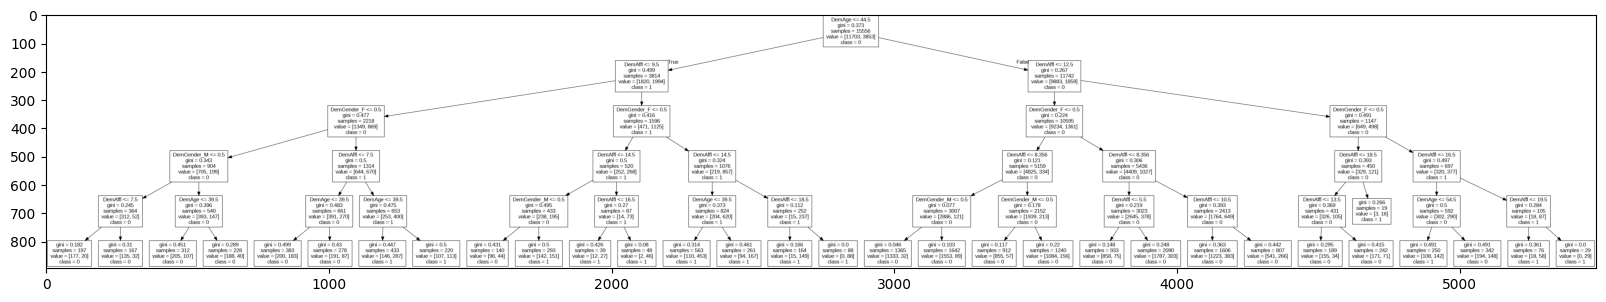

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X3_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y_pred_train3 = dt.predict(X3_train)
y_pred_test3 = dt.predict(X3_test)

y_prob_train3 = dt.predict_proba(X3_train)
y_prob_test3 = dt.predict_proba(X3_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train3)
prec3_train = precision_score(y3_train, y_pred_train3)
rec3_train = recall_score(y3_train, y_pred_train3)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test3)
prec3_test = precision_score(y3_test, y_pred_test3)
rec3_test = recall_score(y3_test, y_pred_test3)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))

 -- train set -- 
Accuracy : 0.8146
Precision: 0.6951
Recall.  : 0.4480

 -- test set -- 
Accuracy : 0.8115
Precision: 0.6851
Recall.  : 0.4425


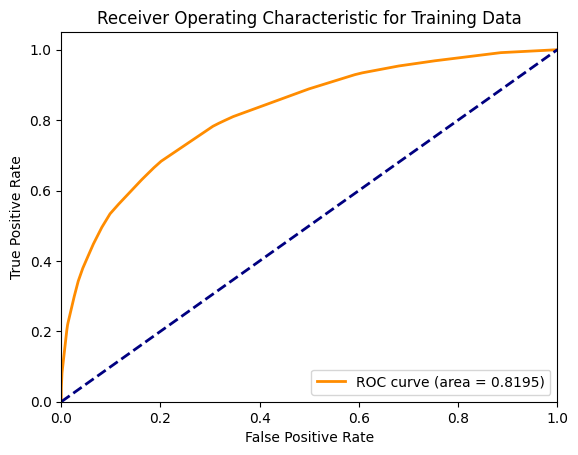

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y3_train.cat.codes, y_prob_train3[:,1])
roc_auc = roc_auc_score(y3_train.cat.codes, y_prob_train3[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

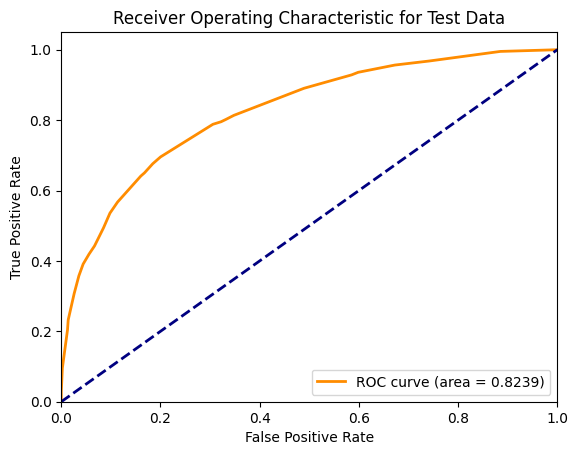

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y3_test.cat.codes, y_prob_test3[:,1])
roc_auc = roc_auc_score(y3_test.cat.codes, y_prob_test3[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                feature
1     0.485956                 DemAge
0     0.339660                DemAffl
12    0.161934            DemGender_F
13    0.012450            DemGender_M
28    0.000000        DemTVReg_N West
23    0.000000          DemTVReg_East
24    0.000000        DemTVReg_London
25    0.000000      DemTVReg_Midlands
26    0.000000        DemTVReg_N East
27    0.000000        DemTVReg_N Scot
29    0.000000    DemTVReg_S & S East
21    0.000000        DemTVReg_Border
30    0.000000        DemTVReg_S West
31    0.000000        DemTVReg_Ulster
32    0.000000       DemTVReg_Unknown
33    0.000000  DemTVReg_Wales & West
34    0.000000     DemTVReg_Yorkshire
35    0.000000         PromClass_Gold
36    0.000000     PromClass_Platinum
37    0.000000       PromClass_Silver
22    0.000000    DemTVReg_C Scotland
19    0.000000      DemReg_South West
20    0.000000         DemReg_Unknown
8     0.000000      DemClusterGroup_D
2     0.000000             DemCluster
3     0.0000

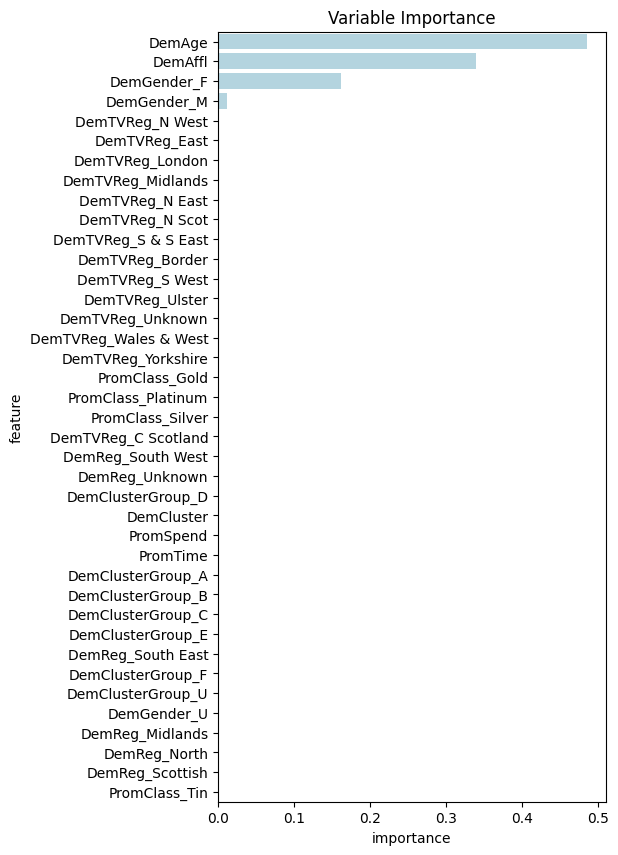

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X3.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

#Increased Depth Decision Tree

In [ ]:
# split the data into training and testing sets
X4 = organics_data.drop(['TargetBuy','TargetAmt'], axis=1)
X4=organics_data[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender','DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]

X4 = pd.get_dummies(X4, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass'], drop_first=False)

y4 = organics_data['TargetBuy']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

X4_train.info()

y4_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_A      15556 non-null  uint8  
 6   DemClusterGroup_B      15556 non-null  uint8  
 7   DemClusterGroup_C      15556 non-null  uint8  
 8   DemClusterGroup_D      15556 non-null  uint8  
 9   DemClusterGroup_E      15556 non-null  uint8  
 10  DemClusterGroup_F      15556 non-null  uint8  
 11  DemClusterGroup_U      15556 non-null  uint8  
 12  DemGender_F            15556 non-null  uint8  
 13  DemGender_M            15556 non-null  uint8  
 14  DemGender_U            15556 non-null  uint8  
 15 

Increased Max Depth

In [ ]:
# create an instance of a decision tree classifier

dt2 = DecisionTreeClassifier(max_depth = 35, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt2.fit(X4_train, y4_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=35, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt2, filled=True, rounded=True, feature_names=X4.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.570486 to fit


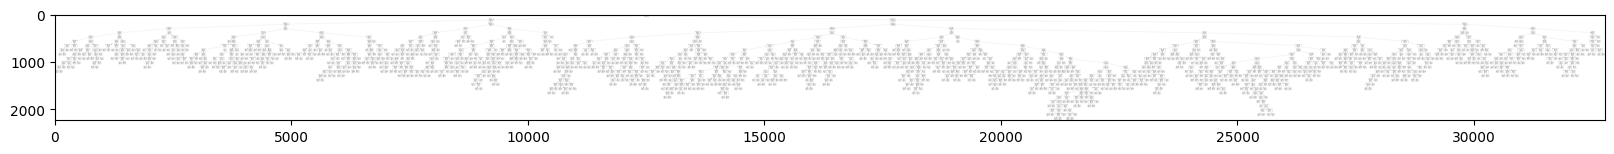

In [ ]:
export_graphviz(dt2,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X4_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y_pred_train4 = dt2.predict(X4_train)
y_pred_test4 = dt2.predict(X4_test)

y_prob_train4 = dt2.predict_proba(X4_train)
y_prob_test4 = dt2.predict_proba(X4_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc4_train = accuracy_score(y4_train, y_pred_train4)
prec4_train = precision_score(y4_train, y_pred_train4)
rec4_train = recall_score(y4_train, y_pred_train4)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc4_train))
print("Precision: {:.4f}".format(prec4_train))
print("Recall.  : {:.4f}".format(rec4_train))
print("")

# calculate the accuracy, precision, and recall scores
acc4_test = accuracy_score(y4_test, y_pred_test4)
prec4_test = precision_score(y4_test, y_pred_test4)
rec4_test = recall_score(y4_test, y_pred_test4)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc4_test))
print("Precision: {:.4f}".format(prec4_test))
print("Recall.  : {:.4f}".format(rec4_test))

 -- train set -- 
Accuracy : 0.8488
Precision: 0.7614
Recall.  : 0.5674

 -- test set -- 
Accuracy : 0.7858
Precision: 0.5872
Recall.  : 0.4564


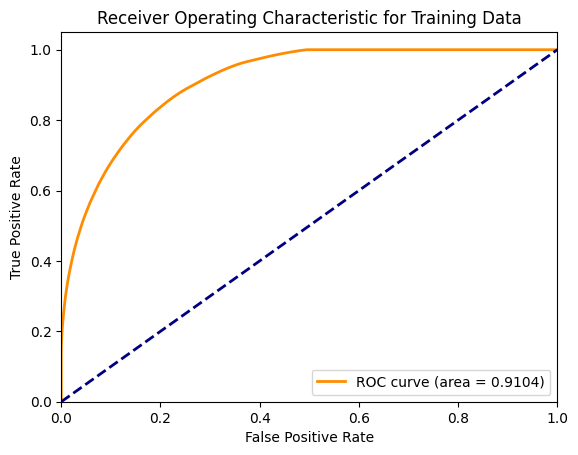

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y4_train.cat.codes, y_prob_train4[:,1])
roc_auc = roc_auc_score(y4_train.cat.codes, y_prob_train4[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

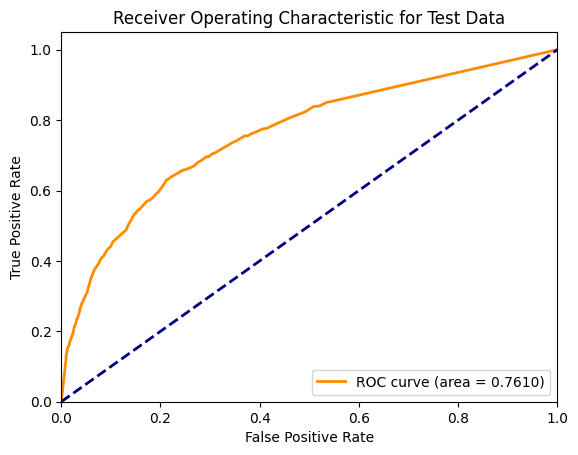

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y4_test.cat.codes, y_prob_test4[:,1])
roc_auc = roc_auc_score(y4_test.cat.codes, y_prob_test4[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                feature
1     0.382196                 DemAge
0     0.243723                DemAffl
12    0.101968            DemGender_F
2     0.070545             DemCluster
3     0.066626              PromSpend
4     0.053035               PromTime
15    0.009971        DemReg_Midlands
14    0.007839            DemGender_U
24    0.007819        DemTVReg_London
37    0.006201       PromClass_Silver
16    0.006003           DemReg_North
25    0.005666      DemTVReg_Midlands
8     0.005590      DemClusterGroup_D
18    0.005556      DemReg_South East
9     0.005059      DemClusterGroup_E
29    0.003141    DemTVReg_S & S East
33    0.002958  DemTVReg_Wales & West
35    0.002718         PromClass_Gold
23    0.002465          DemTVReg_East
7     0.002309      DemClusterGroup_C
28    0.001965        DemTVReg_N West
6     0.001809      DemClusterGroup_B
38    0.001128          PromClass_Tin
32    0.000719       DemTVReg_Unknown
13    0.000617            DemGender_M
17    0.0005

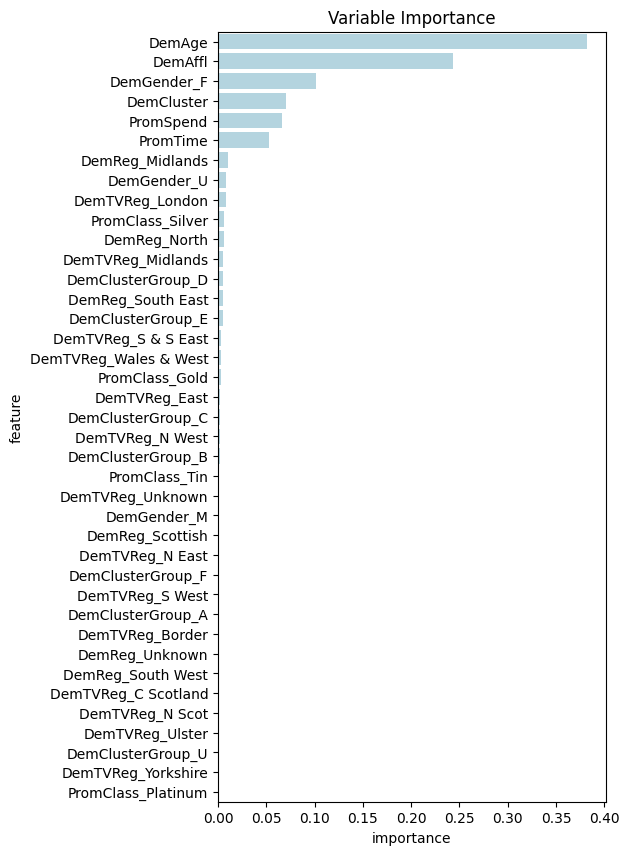

In [ ]:
#calculate feature importance
tree_imp2 = dt2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values2 = ['importance']

# creating the dataframe
df2 = pd.DataFrame(data = tree_imp2,
                  columns = column_values2)
df2['feature']=X4.columns

#sort data so features with largest importance values are at the top
df2 = df2.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

#Scoring New Customers

In [ ]:
# load the data into a pandas dataframe

data_path = '/content/drive/MyDrive/Colab Notebooks/Predictive Analytics- FS/Projects/Project 3 Classification/New_organics.csv'
dfnew = pd.read_csv(data_path)

# preview data
dfnew.info()
dfnew.head
print(dfnew)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
      ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender      DemReg  \
0      1        6      46          27               D         F  South East   
1      2       10      39          12               B         M    Midlands 

In [ ]:
# drop unnecessary columns
dfnew.drop(['ID'], axis=1, inplace=True)
dfnew.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,6,46,27,D,F,South East,London,Tin,0.01,8
1,10,39,12,B,M,Midlands,Ulster,Tin,0.01,5
2,7,75,12,B,M,Midlands,East,Silver,4000.00,7
3,7,72,12,B,F,Midlands,Ulster,Silver,1250.00,23
4,7,43,53,F,M,North,N West,Tin,0.01,5


In [ ]:
X3f=organics_data[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender','DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]

In [ ]:
cat_columns = ['DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass']

df_processed = pd.get_dummies(X3f, prefix_sep="_", columns=cat_columns)

cat_dummies = [col for col in df_processed
               if "_" in col
               and col.split("_")[0] in cat_columns]

processed_columns = list(df_processed.columns[:])

df_test_processed = pd.get_dummies(dfnew, prefix_sep="_",
                                   columns=cat_columns)

# Remove additional columns
for col in df_test_processed.columns:
    if ("_" in col) and (col.split("_")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        df_test_processed.drop(col, axis=1, inplace=True)


for col in cat_dummies:
    if col not in df_test_processed.columns:
        print("Adding missing feature {}".format(col))
        df_test_processed[col] = 0


df_test_processed = df_test_processed[processed_columns]

Adding missing feature DemClusterGroup_U
Adding missing feature DemReg_Unknown
Adding missing feature DemTVReg_Border
Adding missing feature DemTVReg_Unknown


In [ ]:
# make predictions on the training and test data
Scored_class = dt.predict(df_test_processed)
Scored_probs = dt.predict_proba(df_test_processed)

df_test_processed['pred_buy_organic'] = Scored_class
df_test_processed['pred_prob_buy_organic']=Scored_probs[:,1]

print(df_test_processed)

     DemAffl  DemAge  DemCluster  PromSpend  PromTime  DemClusterGroup_A  \
0          6      46          27       0.01         8                  0   
1         10      39          12       0.01         5                  0   
2          7      75          12    4000.00         7                  0   
3          7      72          12    1250.00        23                  0   
4          7      43          53       0.01         5                  0   
..       ...     ...         ...        ...       ...                ...   
145        3      59          12   12000.00         4                  0   
146        8      69          16   14400.00         8                  0   
147        7      27          52       0.01         4                  0   
148       10      63          14    3000.00         7                  0   
149       18      41          35       0.01         5                  0   

     DemClusterGroup_B  DemClusterGroup_C  DemClusterGroup_D  \
0                    0 

In [ ]:
scored_file = 'scored_new_organic.xlsx'
#df_test_processed.to_excel(scored_file)

In [ ]:
#Convert to HTML
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Predictive Analytics- FS/Projects/Project 3 Classification/Nik_Baldis_Project_3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Predictive Analytics- FS/Projects/Project 3 Classification/Nik_Baldis_Project_3.ipynb to html
[NbConvertApp] Writing 1814919 bytes to /content/drive/MyDrive/Colab Notebooks/Predictive Analytics- FS/Projects/Project 3 Classification/Nik_Baldis_Project_3.html
